# Building a Receipt Understanding Model

Receipts are a common way to store information about the items purchased. They are used by customers to keep track of their expenses and by businesses to keep track of their sales. Many customers find it difficult to keep track of their expenses because they have to manually enter the information from the receipts into a spreadsheet. This is a time-consuming process and can lead to errors.

In this notebook, we will build a receipt understanding model that can automatically extract information from receipts. The model will be able to extract the following information from a receipt:
- Date
- Company
- Address
- Total Price

The model will also be able to extract the exact location of each item on the receipt.

### Notebook Outline
The notebook is divided into the following sections:
1. How are we going to build the model?
2. Preprocessing Data
3. Finetuning LayoutLMv3 on the SROI Dataset
4. Using the Receipt Understanding Model
5. Conclusion

# How are we going to build the model?

Understanding receipts presents a significant challenge due to the unstructured nature of the data. Receipts often contain a mix of textual and visual information, making it difficult for model to extract useful information. Information about what a certain item is depends not only on the text but also on its location on the receipt, the structure of the receipt, and the context of the other items on the receipt. This presents a signficant challenge because a successful model will need to incorperate all of these factors to accurately extract information from a receipt.

Although this problem sounds challenging, certain types of models have been built to handle this problem specifically. Theses models are called document understanding models. These models are built to encode both the text and the layout of a document and use this information to extract useful information. The transform documents to a hidden state that can later be used to extract information. We will discussed the hidden state in more detail later.

Building a document understanding model requires a large amount of data and computational resources. However, we can use pre-trained models to build a document understanding model. Pre-trained models are models that have been trained on a large amount of data and can be fine-tuned on a smaller dataset to perform a specific task. These models have been shared by the research community and we can utilize them to build our own document understanding model. This will save us time, computational resources, and will help keep our environmental impact low.

In this notebook, we will be using Microsoft's LayoutLMv3 model to understand the documents. LayoutLMv3 is a state-of-the-art document understanding model that is built to understand both the text and the layout of a document. 


## Understanding the LayoutLMv3 Model

![LayoutLMv3 Architecture](https://raw.githubusercontent.com/ibrahimhabibeg/receipt-understanding/refs/heads/main/images/layoutlmv3_architecture.png)

LayoutLMv3 is a state-of-the-art document understanding model that is built to understand both the text and the layout of a document released by Microsoft in the paper [LayoutLMv3: Pre-training Multimodal Vision-Language Models for Document Understanding](https://arxiv.org/abs/2204.08387). It simplifies LayoutLMv3 by using patch embeddings instead of leveraging a CNN backbone.

The abstract of the paper is as follows:

*Self-supervised pre-training techniques have achieved remarkable progress in Document AI. Most multimodal pre-trained models use a masked language modeling objective to learn bidirectional representations on the text modality, but they differ in pre-training objectives for the image modality. This discrepancy adds difficulty to multimodal representation learning. In this paper, we propose LayoutLMv3 to pre-train multimodal Transformers for Document AI with unified text and image masking. Additionally, LayoutLMv3 is pre-trained with a word-patch alignment objective to learn cross-modal alignment by predicting whether the corresponding image patch of a text word is masked. The simple unified architecture and training objectives make LayoutLMv3 a general-purpose pre-trained model for both text-centric and image-centric Document AI tasks. Experimental results show that LayoutLMv3 achieves state-of-the-art performance not only in text-centric tasks, including form understanding, receipt understanding, and document visual question answering, but also in image-centric tasks such as document image classification and document layout analysis.*

The LayoutLMv3 model process both the text and the layout of a document to extract useful information. Thus it requires 
- Image of the document
- Text of the document alog with their location on the document (bounding box)

## OCR

LayoutLMv3 requires the text and the location of the text on the document. We can use Optical Character Recognition (OCR) to extract the text and the location of the text on the document. OCR is a technology that converts different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. OCR technology is used to convert virtually any type of image containing written text (typed, handwritten, or printed) into machine-readable text data.

We will use tesseract OCR to extract the text and the location of the text on the document. Tesseract OCR is an open-source OCR engine that has been trained on a large amount of data and can be used to extract text from images. Tesseract will provide us with both the text and the location of the text on the document.

## Tokenization

Tesseract will provide us with the text and the location of the text on the document. However, LayoutLMv3 isn't able to directly process text and characters. It requires the text to be transformed to numerical values. This process is called tokenization. It is the process of first splitting the text based on certain rules and then converting the text to numerical values. The numerical values are then used to train the model.

LayoutLMv3 relies on byte-pair encoding (BPE) tokenization. BPE tokenization is a type of tokenization that splits the text into subwords based on the frequency of the subwords in the text. It is a popular tokenization method because it can handle out-of-vocabulary words and can be used to build a vocabulary that can be used to train the model. It has been used in many state-of-the-art models such as GPT-2, BART, and RoBERTa.

## Token Classification Head

By using OCR model and tokenization, LayoutLMv3 will now be able to preocess the receipt and extract useful information. The model emcodes this information in a hidden state. Although the hidden state contains useful information, it is not directly interpretable. We need to build a token classification head to extract useful information from the hidden state. The token classification head is a neural network that takes the hidden state as input and outputs the information that we are interested in. This head will tell us weather each token provided by the OCR model is a date, company, address, total price, or other.

When we initialize this head, it will have random weights and using it will be meaningless. We need to fine-tune the token classification head on a dataset that contains the information that we are interested in. This process will allow the token classification head to learn the relation between the hidden state and the category of the token.

We will use the SROIE dataset to fine-tune the token classification head. The SROIE dataset contains receipts along with the information that we are interested in.

## Section Summary

In this section, we discussed the challenges of understanding receipts and how we can use LayoutLMv3 to extract useful information from receipts. We also discussed the OCR, tokenization, and token classification head that are required to build a receipt understanding model. In the next section, we will preprocess the data and fine-tune the token classification head on the SROIE dataset.

# Preprocessing Data

Now that we have an understanding of the model that we are going to build, let's start preprocessing the data.

In this section we will focus on preprocessing data to build the receipt understanding model. We will finetune Microsoft's open-source [LayoutLMv3 model](https://arxiv.org/abs/2204.08387) on the [Scanned Receipts OCR and Information Extraction (SROIE) dataset](https://paperswithcode.com/dataset/sroie). Our goal is to create train and test datasets that ready to be consumed by the model.

## Data Loading Source
The SROIE dataset was released in the [Robust Reading Competetion](https://rrc.cvc.uab.es/?ch=13). The dataset is shared with us as a Google Drive link containing all files. To help simplify the dataset loading process, we will use the dataset published on Kaggle which can be found [here](https://www.kaggle.com/datasets/urbikn/sroie-datasetv2).

There are other datasets avillable on huggingface and kaggle that are also copies of the original SROIE dataset. I will be using this particular dataset as it contains the files in the same format as the one they released on Google Drive.

Before we load the dataset, we will need to download some neccessary packages and libraries.

*Note: The downloaded packages are the ones not available on Google Colab by default. Downloading them is added here to make it simple and easy to quickly try the code in colab. If you are running this notebook locally, ensure that you're running the notebook in a dedicated conda environment or a virtual environment so that you don't pollute your base environment. If the notebook fails to run locally, make sure you have the other dependencies installed.*

In [1]:
%%capture
! pip install transformers
! pip install datasets
! pip install evaluate
! pip install seqeval
! pip install kaggle
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Now we are going to use the official Kaggle API to download the dataset in the data/unprocessed folder.

In [2]:
%%capture
! kaggle datasets download -d urbikn/sroie-datasetv2

In [3]:
%%capture
! mkdir -p data/unprocessed
! unzip -o sroie-datasetv2.zip -d data/unprocessed
! rm sroie-datasetv2.zip

In [4]:
import os

len(os.listdir('data/unprocessed/SROIE2019/train/img')), len(os.listdir('data/unprocessed/SROIE2019/test/img'))

(626, 347)

The train dataset contains 626 images and the test dataset contains 347 images.

## Initial Data Structure

The downloaded dataset contains two major folders:
1. **train**: This folder contains the training data.
2. **test**: This folder contains the test data.

Each of these folders contains the following subfolders:
1. **img**: This folder containing the images of the receipts.
2. **box**: This folder containing the bounding box information of the text in the images and the text inside the bounding boxes. The file is a text file with the same name as the image file but with a .txt extension. The format of the file is as follows:
    ```
    x1, y1, x2, y2, x3, y3, x4, y4, text
    ```
    where (x1, y1), (x2, y2), (x3, y3), and (x4, y4) are the coordinates of the bounding box and text is the text inside the bounding box.
3. **entities**: This folder contains the ground truth information of the entities in the receipts. The file is a text file with the same name as the image file but with a .txt extension. The file contains json data with the following format:
    ```json
    {
        "company": "COMPANY_NAME",
        "date": "DATE",
        "address": "ADDRESS",
        "total": "TOTAL",
    }
    ```

## Data Preprocessing Steps
We will divide the data preprocessing steps into two major parts:
1. **Data Collection**: In this step we will gather all the information spread across the three subfolders and create a single dataframe with the following columns:
    - `image_path`: The path to the image file.
    - `bboxes`: A list of bounding boxes in the image. Each bounding box is a list of 4 coordinates (x1, y1, x2, y2) where (x1, y1) is the top-left corner and (x2, y2) is the bottom-right corner of the bounding box. The coordinates are normalized between 0 and 1000 as required by the LayoutLMv3 model.
    - `words`: A list of words in the image corresponding to the bounding boxes.
    - `ner_tags`: A list of named entity recognition tags for each word in the image. The tags will encoded as numbers. The possible tags are:
        - **O**: The word is not part of any named entity. (Other)
        - **B-COMPANY**: The word is the company name.
        - **B-DATE**: The word is the date.
        - **B-ADDRESS**: The word is the address.
        - **B-TOTAL**: The word is the total.
2. **Data Processing**: The goal of the step is to create a huggingface dataset that can be consumed by the LayoutLMv3 model. The steps involved in this process are:
    - **Reading Images**: We will read the images and resize them to a fixed size.
    - **Tokenization**: We will tokenize the words in the images using the LayoutLMv3 tokenizer.
    - **Adding Padding**: We will add padding to the tokenized words to make them of the same length.

## Data Collection

We will start by creating a list of all possible ner tags and then create a dictionary to map the tags to their corresponding indices and vice versa.

In [5]:
labels_list = ['O', 'B-COMPANY', 'B-DATE', 'B-ADDRESS', 'B-TOTAL']
ids2labels = {k: v for k, v in enumerate(labels_list)}
labels2ids = {v: k for k, v in enumerate(labels_list)}

The biggest challenge in preprocessing the data is to map each bounding box to the corresponding label. The text provided in the entities file is not always the same as the text in the bounding boxes. Thus, we will use the following approach to achieve this:
1. If SequenceMatcher ratio between the bounding box text and an entity is greater than 0.8, we will assign the corresponding tag to the bounding box text.
2. If a word in bounding box includes the date or total, we will assign the corresponding tag to the word. This is because the date and total are usually written in the same line with other words. For example, the total is usually written as "Total: 100.00" or "Total 100.00" and the date is usually written as "Date: 2022-01-01" or "Date 2022-01-01".
3. If a word in bounding box is a part of the company name or address, we will assign the corresponding tag to the word. This is because the company name and address are usually written in multiple lines and the bounding boxes may not cover the entire text.

In [6]:
from difflib import SequenceMatcher

def get_word_tag(word, entities):
  for entity in entities:
    if SequenceMatcher(None, word.lower(), entities[entity].lower()).ratio() >= 0.8:
      return labels2ids[f'B-{entity}']
    elif entity in ['ADDRESS', 'COMPANY'] and word.lower() in entities[entity].lower():
      return labels2ids[f'B-{entity}']
    elif entity in ['DATE', 'TOTAL'] and entities[entity].lower() in word.lower():
      return labels2ids[f'B-{entity}']
  return labels2ids['O']

Each line in the box file contains the the bbox coordinates and the text in it seperated by a comma. We will create helper functions to parse the line and extract the bbox coordinates and the text. This function will also normalize the bbox coordinates between 0 and 1000.

In [7]:
def get_normalized_bbox(line, img_width, img_height):
  line = line.strip().split(',')
  x1, y1, x2, y2 = int(line[0]), int(line[1]), int(line[6]), int(line[7])
  return [x1 / img_width * 1000, y1 / img_height * 1000, x2 / img_width * 1000, y2 / img_height * 1000]

def get_word(line):
  line = line.strip().split(',')
  return ','.join(line[8:])

The entities file may not contain all the entities in the image. Thus, we will create a helper function to fill in the missing entities with empty strings. This will allow us to easily access all entities without having to check if the entity exists in the dictionary.

In [8]:
import json

def get_entities_dict(entities_file_path):
  entities_file = open(entities_file_path, 'r')
  entities = json.load(entities_file)
  entities_file.close()
  res_dict ={
    'COMPANY': entities.get('company', ''),
    'DATE': entities.get('date', ''),
    'ADDRESS': entities.get('address', ''),
    'TOTAL': entities.get('total', '')
  }
  return res_dict

Now we will create a function creates a dataframe from the data in the `train` and `test` folders. The function will take the path to the `train` and `test` folders as input and return a dataframe with the columns discussed earlier.

In [9]:
from PIL import Image
import pandas as pd
from pathlib import Path

def get_image_dimensions(img_path):
  img = Image.open(img_path)
  return img.size

def create_df(data_dir):
  box_path = os.path.join(data_dir, 'box')
  img_path = os.path.join(data_dir, 'img')
  entities_path = os.path.join(data_dir, 'entities')

  image_path_list = []
  bboxes_list = []
  words_list = []
  ner_tags_list = []

  for file in os.listdir(img_path):
    id = Path(file).stem

    box_file_path = os.path.join(box_path, f'{id}.txt')
    entities_file_path = os.path.join(entities_path, f'{id}.txt')

    img_width, img_height = get_image_dimensions(os.path.join(img_path, file))

    try:
      with open(box_file_path, 'r') as f:
        lines = f.readlines()
        words = [get_word(line) for line in lines]
        bboxes = [get_normalized_bbox(line, img_width, img_height) for line in lines]

      entities = get_entities_dict(entities_file_path)
      ner_tags = [get_word_tag(word, entities) for word in words]

      image_path_list.append(os.path.join(img_path, file))
      bboxes_list.append(bboxes)
      words_list.append(words)
      ner_tags_list.append(ner_tags)
    except:
      pass

  df = pd.DataFrame({
      'image_path': image_path_list,
      'bboxes': bboxes_list,
      'words': words_list,
      'ner_tags': ner_tags_list
  })

  return df

In [10]:
train_df = create_df('data/unprocessed/SROIE2019/train')
test_df = create_df('data/unprocessed/SROIE2019/test')
len(train_df), len(test_df)

(626, 345)

We notice that one test receipt has been dropped. This file contains Euro sign which isn't supported by utf-8. I decided to drop this image by adding the try except block around the code that reads the file. This will allow us to skip the file and continue with the rest of the images.

To get a sense of our labelling stragey, we will calculate how many of each tag we have assigned to the words in the images.

In [11]:
def create_stats_df(df):
  stats_not_other = df['ner_tags'].apply(lambda x: sum([1 for tag in x if tag != labels2ids['O']]))
  stats_total = df['ner_tags'].apply(lambda x: sum([1 for tag in x if tag == labels2ids['B-TOTAL']]))
  stats_address  = df['ner_tags'].apply(lambda x: sum([1 for tag in x if tag == labels2ids['B-ADDRESS']]))
  stats_company = df['ner_tags'].apply(lambda x: sum([1 for tag in x if tag == labels2ids['B-COMPANY']]))
  stats_date = df['ner_tags'].apply(lambda x: sum([1 for tag in x if tag == labels2ids['B-DATE']]))
  stats_df = pd.DataFrame({
      'total': stats_total,
      'address': stats_address,
      'company': stats_company,
      'date': stats_date,
      'not_other': stats_not_other
  })
  return stats_df

stats_df = create_stats_df(train_df)
stats_df.describe()

,total,address,company,date,not_other
count,626.000000,626.000000,626.000000,626.000000,626.000000
mean,3.107029,4.966454,1.305112,1.214058,10.592652
std,2.065267,4.195673,1.103249,0.440575,4.888374
min,1.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,3.000000,1.000000,1.000000,8.000000
50%,3.000000,4.000000,1.000000,1.000000,9.000000
75%,4.000000,5.750000,1.000000,1.000000,12.000000
max,33.000000,25.000000,9.000000,3.000000,39.000000


From the results in the table, we find
- The median number of bounding boxes assigned to `company` tag is 1. This implies the success of our labelling strategy.
- The median number of bounding boxes assigned to `date` tag is 1. This also implies the success of our labelling strategy.
- The median number of bounding boxes assigned to `address` tag is a whooping 4. The most likely reason for this is that the address is usually written in multiple lines and the bounding boxes may not cover the entire text. Moreover, the address may be written multiple times in the receipt.
- The median number of bounding boxes assigned to `total` tag is 3. One possible explanation is that the total is usually written multiple times in the receipt. For example, if you buy only one item, the total value will be written once as item price and once as the total price. Other receipts may include total price after discount and total price before discount which are very likely to be the same.

We want our model to take an image and return a json object with the following format:
```json
{
    "company": "COMPANY_NAME",
    "date": "DATE",
    "address": "ADDRESS",
    "total": "TOTAL",
}
```
Our model may predict the same entity multiple times. Thus we need a stragey to pick only one bounding box for each entity. We will use the following stragey:
- **Company**: We will pick the largest bounding box assigned to the company tag. This is because the company name is usually written with a larger font size than other text in the receipt.
- **Date**: We will pick the bounding box assigned to the date tag that is closest to the top of the image. This is because the date is usually written at the top of the receipt.
- **Address**: We will once again pick the largest bounding box assigned to the address tag. The LayoutLMv3 processor won't read text on seperate lines in the same box. Hence, it is unlikely for us to have one bounding box including the entire address. Our best bet is to pick the largest bounding box hoping it has the most important part of the address.
- **Total**: We will pick the bounding box assigned to the total tag that is closest to the bottom of the image. This is because the total is usually written at the bottom of the receipt. Moreover, if some of the cases where the total is written multiple times occur, the total at the bottom is the most likely to be the final total.

To enhance the performance of our model, we will add this information the training and test datasets. We will create a function that takes the bounding boxes and the ner tags and recreates the tags such that at most one bounding box is assigned to each entity.

In [12]:
def recompute_ner_tags(row):
  ner_tags = row['ner_tags']
  bboxes = row['bboxes']
  
  new_ner_tags = [labels2ids['O'] for _ in ner_tags]
  
  # Give company tag only to the largest bounding box
  company_idx = [i for i, tag in enumerate(ner_tags) if tag == labels2ids['B-COMPANY']]
  if len(company_idx) > 0:
    max_idx = max(company_idx, key=lambda x: (bboxes[x][2] - bboxes[x][0]) * (bboxes[x][3] - bboxes[x][1]))
    new_ner_tags[max_idx] = labels2ids['B-COMPANY']
    
  # Give address tag only to the largest bounding box
  address_idx = [i for i, tag in enumerate(ner_tags) if tag == labels2ids['B-ADDRESS']]
  if len(address_idx) > 0:
    max_idx = max(address_idx, key=lambda x: (bboxes[x][2] - bboxes[x][0]) * (bboxes[x][3] - bboxes[x][1]))
    new_ner_tags[max_idx] = labels2ids['B-ADDRESS']
    
  # Give date tag to the earliest bounding box
  date_idx = [i for i, tag in enumerate(ner_tags) if tag == labels2ids['B-DATE']]
  if len(date_idx) > 0:
    min_idx = min(date_idx, key=lambda x: (bboxes[x][1] + bboxes[x][3])/2)
    new_ner_tags[min_idx] = labels2ids['B-DATE']
  
  # Give total tag to the last bounding box
  total_idx = [i for i, tag in enumerate(ner_tags) if tag == labels2ids['B-TOTAL']]
  if len(total_idx) > 0:
    max_idx = max(total_idx, key=lambda x: (bboxes[x][1] + bboxes[x][3])/2)
    new_ner_tags[max_idx] = labels2ids['B-TOTAL']
    
  return new_ner_tags

In [13]:
train_df['ner_tags'] = train_df.apply(recompute_ner_tags, axis=1)
test_df['ner_tags'] = test_df.apply(recompute_ner_tags, axis=1)

In [14]:
train_stats_df = create_stats_df(train_df)
train_stats_df.describe()

,total,address,company,date,not_other
count,626.0,626.000000,626.000000,626.000000,626.000000
mean,1.0,0.992013,0.880192,0.996805,3.869010
std,0.0,0.089085,0.324997,0.056478,0.342365
min,1.0,0.000000,0.000000,0.000000,2.000000
25%,1.0,1.000000,1.000000,1.000000,4.000000
50%,1.0,1.000000,1.000000,1.000000,4.000000
75%,1.0,1.000000,1.000000,1.000000,4.000000
max,1.0,1.000000,1.000000,1.000000,4.000000


In [15]:
test_stats_df = create_stats_df(test_df)
test_stats_df.describe()

,total,address,company,date,not_other
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.997101,0.985507,0.881159,0.991304,3.855072
std,0.053838,0.119684,0.324071,0.092979,0.360691
min,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1.000000,1.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000


Now that's much better. The table shows the median number of bounding boxes assigned to any tag is 1. This will make our model better able to understand the receipt.

## Data Processing

I will start by directly converting the dataframes to huggingface datasets.

In [16]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset, test_dataset

(Dataset({
     features: ['image_path', 'bboxes', 'words', 'ner_tags'],
     num_rows: 626
 }),
 Dataset({
     features: ['image_path', 'bboxes', 'words', 'ner_tags'],
     num_rows: 345
 }))

Now, we will instantiate the LayoutLMv3 processor to tokenize the words in the images, resize the images, and add padding to the tokenized words.

We will add the argument `apply_ocr=False` to the processor to avoid applying OCR on the images. While fine-tuning the model, we will train the head of the model on the annotated data. If we apply OCR on the images, we won't have the labels for the extracted words. However, we will apply OCR on the images when we use the model for inference.

In [17]:
from transformers import AutoProcessor

model_id = "microsoft/layoutlmv3-base"

processor = AutoProcessor.from_pretrained(model_id, apply_ocr=False)

We are going to create a function that maps the unprocessed data to the processed data. The function will take the unprocessed examples and use the processor to create the processed examples.

In [18]:
def prepare_examples(examples):
  images = [Image.open(path).convert('RGB') for path in examples["image_path"]]
  words = examples["words"]
  bboxes = examples["bboxes"]
  ner_tags = examples["ner_tags"]
  encoding = processor(images, words, boxes=bboxes, word_labels=ner_tags, padding="max_length", truncation=True)
  return encoding

Before we apply the mapping, we are going to define the features of the processed dataset.

*Note that 224 x 224 is the image size expected by the LayoutLMv3 model and 512 is the maximum sequence length expected by the model.*

In [19]:
from datasets import Features, Sequence, Value, Array2D, Array3D

features = Features({
  'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
  'input_ids': Sequence(feature=Value(dtype='int64')),
  'attention_mask': Sequence(Value(dtype='int64')),
  'bbox': Array2D(dtype="int64", shape=(512, 4)),
  'labels': Sequence(feature=Value(dtype='int64')),
})

Finally, we will apply the mapping to the train and test datasets and save them to disk.

Notice that I have changed the default `batch_size` to 32. The deafult batch size is 1000. Loading a 1000 image simultaneously will consume a lot of memory. I have reduced the batch size to 32 to avoid memory issues. You can increase the batch size if you have enough memory.

In [20]:
train_dataset = train_dataset.map(prepare_examples, batched=True, remove_columns=train_dataset.column_names, batch_size=32, features=features)
test_dataset = test_dataset.map(prepare_examples, batched=True, remove_columns=test_dataset.column_names, batch_size=32, features=features)

Map:   0%|          | 0/626 [00:00<?, ? examples/s]

Map:   0%|          | 0/345 [00:00<?, ? examples/s]

In [21]:
train_dataset.save_to_disk('data/train')
test_dataset.save_to_disk('data/test')

Saving the dataset (0/1 shards):   0%|          | 0/626 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/345 [00:00<?, ? examples/s]

## Section Summary

In this section, we have preprocessed the SROIE dataset to create a train and test dataset that can be consumed by the LayoutLMv3 model. We have created a dataframe with the necessary information and then processed the data to create a huggingface dataset. The processed dataset is saved to disk and can be used to fine-tune the LayoutLMv3 model. Now we are ready to the next step where we build the receipt understanding model.

# Finetuning LayoutLMv3 on the SROIE Dataset

In the previous section, we preprocessed the SROIE dataset to be ready to be used by the LayoutLMv3 model. In this section we will finetune the LayoutLMv3 model on the SROIE dataset for Named Entity Recognition (NER). NER is the task of identifying named entities in the text and classifying them into predefined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

To do so, we will add a token classification head on top of the LayoutLMv3 model. The head will be initialized with random weights and then trained on the SROIE dataset. At the end of the training, the model will be able to predict whether each token in the scanned receipt stands for the following entities: `company`, `date`, `address`, `total`, or `other`.

## Loading the Dataset

Let's start by loading the preprocessed SROIE dataset. They are stored in the `data` folder in the `train` and `test` subfolders. For more information about the preprocessing, please refer to the `Preprocessing.ipynb` notebook.

In [22]:
from datasets import load_from_disk

train_dataset = load_from_disk("data/train")
test_dataset = load_from_disk("data/test")

## Loading the Processor

We will also need to load the LayoutLMv3 processor.

In [23]:
from transformers import AutoProcessor

model_id = 'microsoft/layoutlmv3-base'
processor = AutoProcessor.from_pretrained(model_id)

## Loading the Model

We will use the `AutoModelForTokenClassification` class from the `transformers` library to load the LayoutLMv3 model with a token classification head. The model head will be initialized with random weights.

In [24]:
from transformers import AutoModelForTokenClassification

labels_list = ['O', 'B-COMPANY', 'B-DATE', 'B-ADDRESS', 'B-TOTAL']
ids2labels = {k: v for k, v in enumerate(labels_list)}
labels2ids = {v: k for k, v in enumerate(labels_list)}

model = AutoModelForTokenClassification.from_pretrained(model_id, label2id=labels2ids, id2label=ids2labels)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Computing Metrics

We will use the `seqeval` library to compute the precision, recall, and F1 score of the model on the test set.

In [25]:
import numpy as np
import evaluate

seqeval = evaluate.load("seqeval")

def compute_metrics(p):
  predictions, labels = p
  predictions = np.argmax(predictions, axis=2)
  true_predictions = [
    [labels_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
  ]
  true_labels = [
    [labels_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
  ]
  results = seqeval.compute(predictions=true_predictions, references=true_labels)
  return {
      "precision": results["overall_precision"],
      "recall": results["overall_recall"],
      "f1": results["overall_f1"],
      "accuracy": results["overall_accuracy"],
  }

## Training

First we need to define the training arguments. I will use the following arguments:
- `output_dir='checkpoints'`: The directory where the model checkpoints and evaluation results will be saved.
- `num_train_epochs=3`: The number of epochs to train the model.
- `eval_steps=100`: Evaluate the model every 100 steps.
- `load_best_model_at_end=True`: Load the best model at the end of training.
- `metric_for_best_model='f1'`: Use the F1 score to select the best model.
- `per_device_train_batch_size=4`: The batch size for training. We decreased it from the default value of 8 to avoid running out of memory.
- `per_device_eval_batch_size=4`: The batch size for evaluation. We decreased it from the default value of 8 to avoid running out of memory.
- `save_strategy='steps'`: Save the model checkpoints every 100 steps.
- `eval_strategy='steps'`: Evaluate the model every 100 steps.

In [26]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="checkpoints",
                                  num_train_epochs=3,
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  per_device_train_batch_size=4,
                                  per_device_eval_batch_size=4,
                                  save_strategy="steps",
                                  eval_strategy="steps")

Now we can initialize the `Trainer` class and start the training.

In [27]:
from transformers import Trainer, default_data_collator

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

In [28]:
trainer.train()

  0%|          | 0/471 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

{'eval_loss': 0.08047546446323395, 'eval_precision': 0.8137326515704895, 'eval_recall': 0.837593984962406, 'eval_f1': 0.8254909225639127, 'eval_accuracy': 0.9751937150236762, 'eval_runtime': 18.1591, 'eval_samples_per_second': 18.999, 'eval_steps_per_second': 4.791, 'epoch': 0.64}


  0%|          | 0/87 [00:00<?, ?it/s]

{'eval_loss': 0.06006913259625435, 'eval_precision': 0.8621200889547813, 'eval_recall': 0.8744360902255639, 'eval_f1': 0.8682344158268009, 'eval_accuracy': 0.9811127851915626, 'eval_runtime': 18.4177, 'eval_samples_per_second': 18.732, 'eval_steps_per_second': 4.724, 'epoch': 1.27}


  0%|          | 0/87 [00:00<?, ?it/s]

{'eval_loss': 0.051054880023002625, 'eval_precision': 0.8788321167883212, 'eval_recall': 0.9052631578947369, 'eval_f1': 0.8918518518518519, 'eval_accuracy': 0.9843413689195006, 'eval_runtime': 18.5554, 'eval_samples_per_second': 18.593, 'eval_steps_per_second': 4.689, 'epoch': 1.91}


  0%|          | 0/87 [00:00<?, ?it/s]

{'eval_loss': 0.054725728929042816, 'eval_precision': 0.8865979381443299, 'eval_recall': 0.9052631578947369, 'eval_f1': 0.8958333333333333, 'eval_accuracy': 0.9850947051226862, 'eval_runtime': 18.7659, 'eval_samples_per_second': 18.384, 'eval_steps_per_second': 4.636, 'epoch': 2.55}
{'train_runtime': 288.2336, 'train_samples_per_second': 6.516, 'train_steps_per_second': 1.634, 'train_loss': 0.07248994701733762, 'epoch': 3.0}


TrainOutput(global_step=471, training_loss=0.07248994701733762, metrics={'train_runtime': 288.2336, 'train_samples_per_second': 6.516, 'train_steps_per_second': 1.634, 'total_flos': 495041961535488.0, 'train_loss': 0.07248994701733762, 'epoch': 3.0})

On a typical run, the model should reach a F1 score of around 0.9 on the test set.

In [29]:
trainer.evaluate()

  0%|          | 0/87 [00:00<?, ?it/s]

{'eval_loss': 0.05205996334552765,
 'eval_precision': 0.89395070948469,
 'eval_recall': 0.9,
 'eval_f1': 0.8969651554889472,
 'eval_accuracy': 0.9853099440378821,
 'eval_runtime': 18.3982,
 'eval_samples_per_second': 18.752,
 'eval_steps_per_second': 4.729,
 'epoch': 3.0}

We will also save the model and the processor to disk for later use.

In [30]:
trainer.save_model("model")

## Section Summary

In this section, we have finetuned the LayoutLMv3 model on the SROIE dataset for Named Entity Recognition (NER). We have added a token classification head on top of the LayoutLMv3 model and trained the model on the SROIE dataset. The model has achieved a F1 score of around 0.9 on the test set. We have saved the model and the processor to disk for later use. In the next section, we will create classes that will allow us to easily use the model for inference.

# Using the Receipt Understanding Model

In this section, we are going to use the model that we have trained to extract information from receipts. We will start by creating a class to load the model and the processor from disk and use them to make predictions on new receipts. The class will take an image as input, preprocess it, and then output the words, bounding boxes, and predicted entities.

In [31]:
import torch
from collections import Counter

class ReceiptReader:
  def __init__(self, path_to_model="model"):
    self.model = AutoModelForTokenClassification.from_pretrained(path_to_model)
    self.model.eval()
    self.processor = AutoProcessor.from_pretrained(path_to_model)      

  def __call__(self, image):
    encodings = self.__get_encodings(image)
    words = self.__get_words(encodings)
    bboxes = encodings.bbox[0]
    logits = self.model(**encodings).logits
    predictions = torch.argmax(logits, dim=2)
    labeled_tokens = [self.model.config.id2label[t.item()] for t in predictions[0]]
    response_dict = self.__merge_tokens(words, bboxes, labeled_tokens)
    response_dict["bboxes"] = [self.__unnormalize_bbox(bbox, image) for bbox in response_dict["bboxes"]]
    return response_dict
  
  def __get_encodings(self, image):
    return self.processor(image, return_tensors="pt")
  
  def __get_words(self, encodings):
    words = [self.processor.tokenizer.decode(input_id) for input_id in encodings.input_ids[0]]
    return words
  
  def __merge_tokens(self, words, bboxes, labels):
    new_words = []
    new_bboxes = []
    new_labels = []
    i = 0
    while i < len(words):
        token, bbox, label = words[i], bboxes[i], labels[i]
        j = i + 1
        while j < len(words) and self.__is_same_bbox(bbox, bboxes[j]):
            token += words[j]
            j += 1
        counter = Counter([labels[k] for k in range(i, j)])
        sorted_labels = sorted(counter, key=counter.get, reverse=True)
        if sorted_labels[0] == "O" and len(sorted_labels) > 1:
          label = sorted_labels[1]
        else:
          label = sorted_labels[0]
        new_words.append(token)
        new_bboxes.append(bbox)
        new_labels.append(label)
        i = j
    return {
        "words": new_words,
        "bboxes": new_bboxes,
        "labels": new_labels
    }
  
  def __is_same_bbox(self, bbox1, bbox2):
    for i in range(4):
        if abs(bbox1[i] - bbox2[i]) > 3:
            return False
    return True
  
  def __unnormalize_bbox(self, bbox, image):
    width, height = image.size
    return [bbox[0] * width / 1000, bbox[1] * height / 1000, bbox[2] * width / 1000, bbox[3] * height / 1000]

Let's ensure the length of all the resulting lists are the same.

In [32]:
import PIL

image = PIL.Image.open("data/unprocessed/SROIE2019/test/img/X51007339122.jpg").convert("RGB")
receipt_reader = ReceiptReader()
receipt_data = receipt_reader(image)
len(receipt_data["words"]), len(receipt_data["bboxes"]), len(receipt_data["labels"])

(127, 127, 127)

Now we are going to use `ReceiptReader` class to create `ReceiptLabeler` class. This class will take an image as input and then visualize the bounding boxes and the predicted entities.

In [33]:
from PIL import ImageDraw
class ReceiptLabeler:
  def __init__(self, path_to_model="model"):
    self.receipt_reader = ReceiptReader(path_to_model)
    self.label_colors = {
        "O": "yellow",
        "B-COMPANY": "purple",
        "B-DATE": "green",
        "B-ADDRESS": "blue",
        "B-TOTAL": "red"
    }
  
  def __call__(self, image, include_others=False, include_words=False):
    receipt_data = self.receipt_reader(image)
    
    labeled_image = image.copy()
    draw = ImageDraw.Draw(labeled_image)
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if include_others or label != "O":
        draw.rectangle(bbox, outline=self.label_colors[label], width=2)
        draw.text((bbox[0], bbox[1]-10), label, fill=self.label_colors[label])
        if include_words:
          draw.text((bbox[0], bbox[3]), word, fill=self.label_colors[label])
        
    return labeled_image    

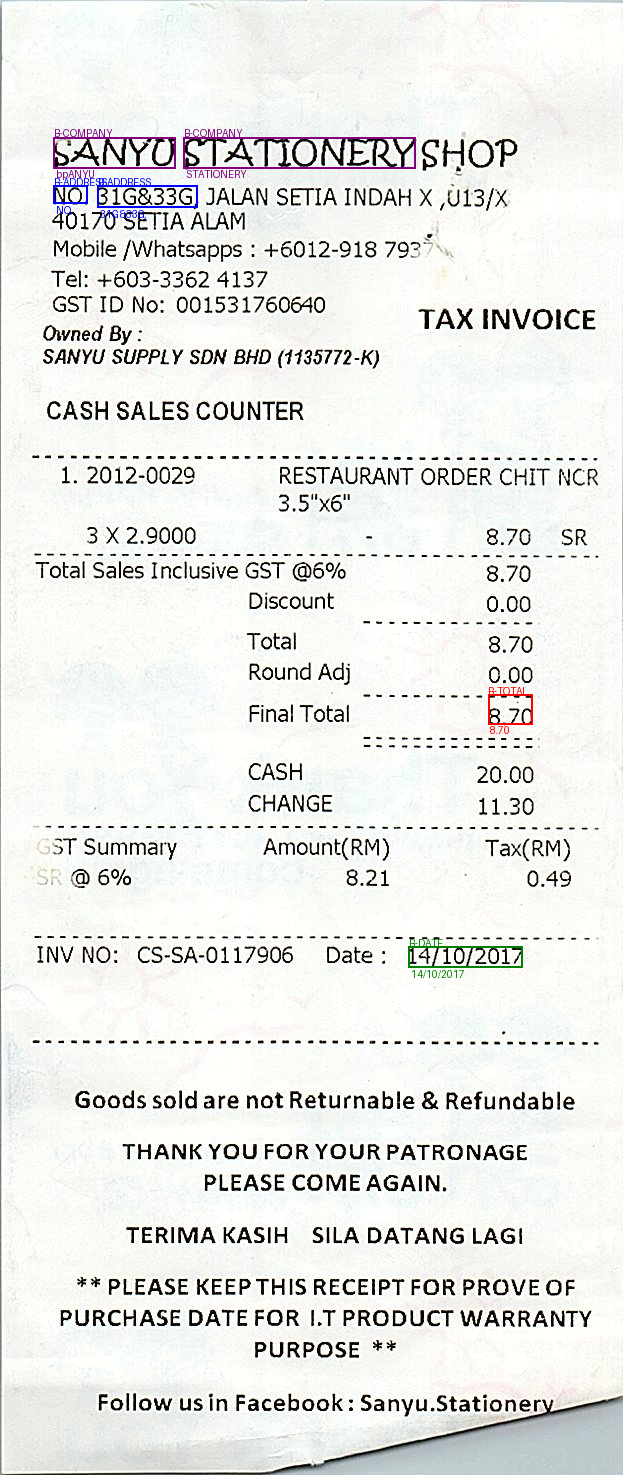

In [34]:
receipt_labeler = ReceiptLabeler()
labeled_image = receipt_labeler(image, include_words=True)
labeled_image

We will also create `ReceiptInformationExtractor` class. This class will take an image as input and returns a dictionary with the extracted information. The class will select one of the labeled bounding boxes based on the stragety previously dicussed in the `Preprocessing.ipynb` notebook.

In [35]:
class ReceiptInformationExtractor:
  def __init__(self, path_to_model="model"):
    self.receipt_reader = ReceiptReader(path_to_model)
  
  def __call__(self, image):
    receipt_data = self.receipt_reader(image)
    response_dict = {
        "company": "",
        "date": "",
        "address": "",
        "total": ""
    }
    
    # Get the company having the largest bbox
    max_bbox = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-COMPANY":
        bbox_size = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
        if bbox_size > max_bbox:
          response_dict["company"] = word.strip()
          max_bbox = bbox_size
          
    # Get the address having the largest bbox
    max_bbox = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-ADDRESS":
        bbox_size = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
        if bbox_size > max_bbox:
          response_dict["address"] = word.strip()
          max_bbox = bbox_size
  
    # Get the topmost date
    min_y = float("inf")
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-DATE" and bbox[1] < min_y:
        response_dict["date"] = word.strip()
        min_y = bbox[1]

    # Get the bottommost total
    max_y = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-TOTAL" and bbox[3] > max_y:
        response_dict["total"] = word.strip()
        max_y = bbox[3]
        
    return response_dict
  

In [36]:
receipt_info_extractor = ReceiptInformationExtractor()
receipt_info_extractor(image)

{'company': 'STATIONERY',
 'date': '14/10/2017',
 'address': '31G&33G,',
 'total': '8.70'}

## Section Summary

In this section, we have created classes that allow us to easily use the receipt understanding model for inference. We have created a `ReceiptLabeler` class that visualizes the bounding boxes and the predicted entities and a `ReceiptInformationExtractor` class that extracts the information from the receipt.

# Conclusion

Reciept understanding is a challenging task that requires understanding both the text and the layout of the document. In this notebook, we have built a receipt understanding model that can automatically extract information from receipts. The model is able to extract the following information from a receipt:
- Date
- Company
- Address
- Total Price

We built the model using Microsoft's LayoutLMv3 model and fine-tuned it on the SROIE dataset. The model achieved a F1 score of around 0.9 on the test set. We have also created classes that allow us to easily use the model for inference. The `ReceiptLabeler` class visualizes the bounding boxes and the predicted entities and the `ReceiptInformationExtractor` class extracts the information from the receipt.

By the end of this notebook, I hope you've gained a deeper appreciation for the capabilities of deep learning and the power of fine-tuning pre-trained models. This journey has just begun, and the possibilities for further exploration are vast!

Feel free to experiment with the code and explore its potential. If you have any questions or feedback, don't hesitate to leave a comment on the GitHub repository [here](https://github.com/ibrahimhabibeg/recipt-understanding) or reach out to me on [LinkedIn](https://www.linkedin.com/in/ibrahimhabibeg/).

Thank you for joining me on this exploration of receipt understanding!